## Prepare the data


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


train_data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/test.csv')

# print(train_data.info())
# print(train_data.describe())

df = train_data.drop(['Name'], axis=1)

## fill missing values,firstly, I will fill the missing values in the Age column with the mean value of the column
df['Age'].fillna(df['Age'].mean(), inplace=True)
# 找出carbin列出现频率最高的元素
# print(df['Cabin'].value_counts())
print(df['Embarked'].value_counts())
df['Cabin'].fillna('U', inplace=True)
df['Embarked'].fillna('S', inplace=True)



print(df.info())
print(df.describe())





Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        891 non-null    object 
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     2

C:\Users\16972\AppData\Local\Temp\ipykernel_4616\3147702379.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
C:\Users\16972\AppData\Local\Temp\ipykernel_4616\3147702379.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

## Check the data, analyze the data, and visualize the data

C:\Users\16972\AppData\Local\Temp\ipykernel_4616\2609053857.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survived = df.groupby(age_range)['Survived'].mean()
C:\Users\16972\AppData\Local\Temp\ipykernel_4616\2609053857.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survived_people_age = df.groupby(age_range)['Survived'].sum()
C:\Users\16972\AppData\Local\Temp\ipykernel_4616\2609053857.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future def

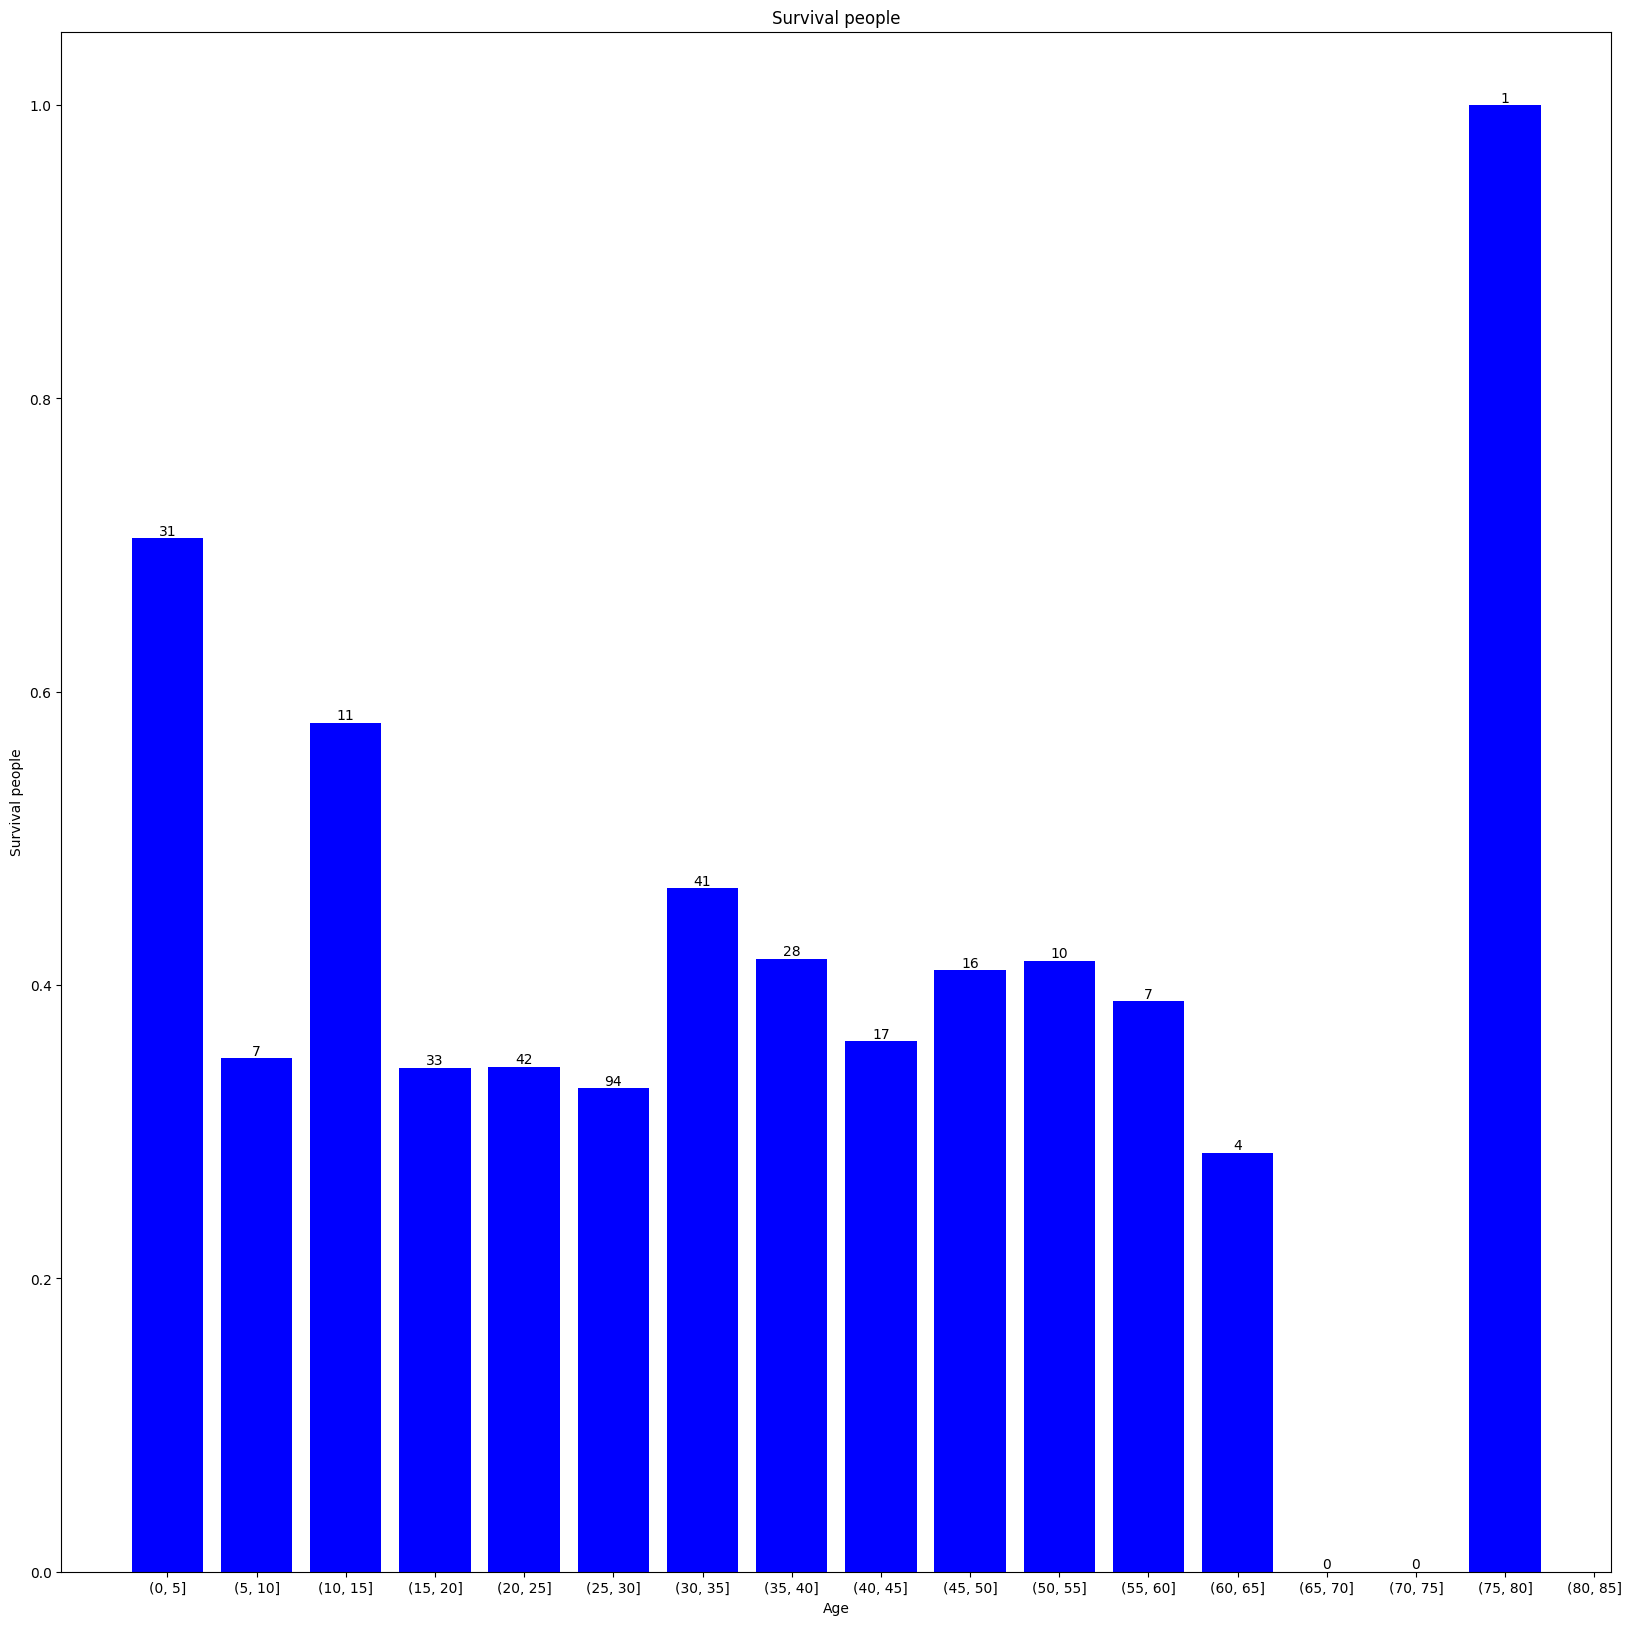

In [5]:
# print(df.head())



# one-hot encoding


# 首先分析数据的分布情况
sex = df.groupby('Sex')['Survived'].mean()

pclass_survivied = df.groupby('Pclass')['Survived'].mean()
   

# 查看age列survived为1或者0最多的年龄范围（5岁范围内）
age_range = pd.cut(df['Age'], np.arange(0, 90, 5))
# 查看每个年龄段survived存活率
age_survived = df.groupby(age_range)['Survived'].mean()

survived_people_age = df.groupby(age_range)['Survived'].sum()
# print(survived_people_age)
# print(survived_people_age)

# age_survived.plot(kind='bar')
# plt.show()

sibsp_survived = df.groupby('SibSp')['Survived'].mean()
parch_survived = df.groupby('Parch')['Survived'].mean()

max_fare = df['Fare'].max()
# 找出最大fare对应的survived
max_fare_survived = df[df['Fare'] == max_fare]['Survived']
fare_cut = pd.cut(df['Fare'], np.arange(0, 600, 50))
fare_survived = df.groupby(fare_cut)['Survived'].mean()

#将fare_survived的空值行删除
fare_survived.dropna(inplace=True)

# print(fare_survived)
# print(parch_survived)
# print(fare_survived)


# 现在我需要查看carbin的分布情况
#将Cabin的值转换为首字母
df['Cabin'] = df['Cabin'].map(lambda x: x[0])
cabin_survived = df.groupby('Cabin')['Survived'].mean()
# print(cabin_survived)

# 查看Embarked的分布情况
embarked_survived = df.groupby('Embarked')['Survived'].mean()



# 对他们进行可视化，选择最适合的可视化方式
# fig, axes = plt.subplots(2, 3, figsize=(15, 15))
# fig.set(alpha=0.2)

# axes[0,0].bar(sex.index,sex.values, color='r')
# axes[0,0].set_title('Survival rate by sex')
# axes[0,0].set_xlabel('Sex')
# axes[0,0].set_ylabel('Survival rate')

# axes[0,1].bar(pclass_survivied.index, pclass_survivied.values, color='g')
# axes[0,1].set_title('Survival rate by Pclass')
# axes[0,1].set_xlabel('Pclass')
# axes[0,1].set_ylabel('Survival rate')

# axes[0,2].bar(cabin_survived.index, cabin_survived.values, color='k')
# axes[0,2].set_title('Survival rate by Cabin')
# axes[0,2].set_xlabel('Cabin')
# axes[0,2].set_ylabel('Survival rate')



# axes[1,0].bar(sibsp_survived.index, sibsp_survived.values, color='y')
# axes[1,0].set_title('Survival rate by SibSp')
# axes[1,0].set_xlabel('SibSp')
# axes[1,0].set_ylabel('Survival rate')


# axes[1,1].bar(parch_survived.index, parch_survived.values, color='c')
# axes[1,1].set_title('Survival rate by Parch')
# axes[1,1].set_xlabel('Parch')
# axes[1,1].set_ylabel('Survival rate')


# axes[1,2].bar(embarked_survived.index, embarked_survived.values, color='b')
# axes[1,2].set_title('Survival rate by Embarked')
# axes[1,2].set_xlabel('Embarked')
# axes[1,2].set_ylabel('Survival rate')

# plt.show()


# 统计每个年龄段的工资平均数


fig, axes = plt.subplots(figsize=(20, 20))

axes.bar(age_survived.index.astype(str), age_survived.values, color='b')
axes.set_title('Survival people')
axes.set_xlabel('Age')
axes.set_ylabel('Survival people')
#在每个bar上显示每个年龄段存活人数survived_people_age
for i in range(len(age_survived)):
    axes.text(i, age_survived.values[i], str(survived_people_age.values[i]), ha='center', va='bottom', fontsize=10)





# axes[1].bar(age_survived.index.astype(str), age_survived.values, color='b')
# axes[1].set_title('Survival rate by Age')
# axes[1].set_xlabel('Age')
# axes[1].set_ylabel('Survival rate')



# # 查看各个属性和Survived之间的相关性
# print(f"the correlation between Pclass and Survived is {df.Pclass.corr(df.Survived)}")
# print(f"the correlation between Age and Survived is {df.Age.corr(df.Survived)}")

# print(f"the correlation between SibSp and Survived is {df.SibSp.corr(df.Survived)}")
# print(f"the correlation between Parch and Survived is {df.Parch.corr(df.Survived)}")
# print(f"the correlation between Fare and Survived is {df.Fare.corr(df.Survived)}")    

# # 从上面的结果可以看出，Pclass和Survived之间的相关性最大，所以我们可以认为Pclass是一个比较重要的特征
# # 下面我们将对Pclass和Survived之间的关系进行可视化
# fig = plt.figure()
# fig.set(alpha=0.2)
# Survived_0 = df.Pclass[df.Survived == 0].value_counts()
# Survived_1 = df.Pclass[df.Survived == 1].value_counts()
# df_survived = pd.DataFrame({'Survived': Survived_1, 'Unsurvived': Survived_0})
# df_survived.plot(kind='bar', stacked=True)
# plt.title('Survived by Pclass')
# plt.xlabel('Pclass')
# plt.ylabel('count')
# plt.show()






## Building the random forest model

In [10]:
##构建一个随即森林来进行判断

from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# 选择特征
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked']

X = df[features]
y = df['Survived']





# 对特征进行处理
dict_vec = DictVectorizer(sparse=False)
X = dict_vec.fit_transform(X.to_dict(orient='records'))

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)

# 随机森林
rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(X_train, y_train)
print('The accuracy of Random Forest Classifier on testing set:', rfc.score(X_test, y_test))

# 交叉验证
print('The cross validation score of Random Forest Classifier is:', np.mean(cross_val_score(rfc, X, y, cv=10, verbose=1)))

# 输出特征重要性
print(sorted(zip(rfc.feature_importances_, dict_vec.get_feature_names_out()), reverse=True))

print("Feature name:", dict_vec.get_feature_names_out())

# 预测

test_data.fillna({'Age': test_data['Age'].mean(), 'Fare': test_data['Fare'].mean(),"Carbin":'U'}, inplace=True)

X_test = test_data[features]
X_test = dict_vec.transform(X_test.to_dict(orient='records'))

rfc_y_predict = rfc.predict(X_test)

rfc_submission = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': rfc_y_predict})
rfc_submission.to_csv('./data/rfc_submission.csv', index=False)




The accuracy of Random Forest Classifier on testing set: 0.8430493273542601
The cross validation score of Random Forest Classifier is: 0.8125967540574282
[(0.2463583631976254, 'Age'), (0.24300983533854237, 'Fare'), (0.12795292351345816, 'Sex=male'), (0.12514561990510337, 'Sex=female'), (0.06523187300962577, 'Pclass'), (0.044236671480273916, 'SibSp'), (0.04088479296797524, 'Parch'), (0.0292553717755429, 'Cabin=U'), (0.015969749275758952, 'Embarked=C'), (0.014382224002349828, 'Embarked=S'), (0.010751311669153095, 'Cabin=E'), (0.007596371445418081, 'Cabin=B'), (0.007561600254185111, 'Embarked=Q'), (0.0070373758996178145, 'Cabin=C'), (0.006521610381832579, 'Cabin=D'), (0.0038833159531967217, 'Cabin=A'), (0.0022646251809300983, 'Cabin=F'), (0.0017084248195062212, 'Cabin=G'), (0.0002479399299044903, 'Cabin=T')]
Feature name: ['Age' 'Cabin=A' 'Cabin=B' 'Cabin=C' 'Cabin=D' 'Cabin=E' 'Cabin=F'
 'Cabin=G' 'Cabin=T' 'Cabin=U' 'Embarked=C' 'Embarked=Q' 'Embarked=S'
 'Fare' 'Parch' 'Pclass' 'Sex=fe